In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-14T23:47:41.249631+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/4 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.337860107421875e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 2.0343472957611084}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.1268787384033203}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.020057201385498047}


 25%|██▌       | 1/4 [00:02<00:08,  2.97s/it]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.337860107421875e-05}
enter log_context_duration for _do_sequences


 50%|█████     | 2/4 [00:03<00:02,  1.42s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.173201322555542}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.057871341705322266}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.006833314895629883}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.384185791015625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.43993544578552246}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.1407909393310547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.019005298614501953}


100%|██████████| 4/4 [00:04<00:00,  1.05s/it]


enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.384185791015625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.03854870796203613}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.012708902359008789}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0019199848175048828}
exit log_context_duration for generate_dummy_sequences_simple
!!! {"generate_dummy_sequences_simple": 5.806101560592651}
enter log_context_duration for extract variant
exit log_context_duration for extract variant
!!! {"extract variant": 0.2063610553741455}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.30537986755371094}
Rows: 5
Columns: 3
$ id       <i64> 136279, 136374, 136465, 138720, 138914
$ sequen

 14%|█▍        | 1/7 [00:00<00:00,  6.39it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002789020538330078}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.08296608924865723}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.06638193130493164}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0033020973205566406}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.06066417694091797}
enter log_context_duration for res.collect


 57%|█████▋    | 4/7 [00:00<00:00, 11.10it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.04470992088317871}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0033860206604003906}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.5762786865234375e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.04567122459411621}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.023175954818725586}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0031807422637939453}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.814697265625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03966259956359863}
enter log_context_duration for res.collect
exit log_context_duration for res.colle

 86%|████████▌ | 6/7 [00:00<00:00,  9.84it/s]

enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.029961347579956055}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003557920455932617}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.06753993034362793}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.04819440841674805}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003084421157836914}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 4.0531158447265625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.028525114059448242}
enter log_context_duration for res.col

100%|██████████| 7/7 [00:00<00:00, 10.28it/s]


exit log_context_duration for res.collect
!!! {"res.collect": 0.014163017272949219}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 1.388721227645874}
sequence_diff
{"0": "'",    35140
{"0": "'"}     4729
Name: count, dtype: int64
Rows: 5
Columns: 19
$ source                    <i64> 107456, 107456, 10699, 10699, 10699
$ target                    <i64> 107456, 107456, 10699, 10699, 82726
$ date                      <i64> 0, 0, 0, 0, 3
$ layer                     <str> 'importation', 'importation', 'importation', 'importation', 'w'
$ variant                   <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
$ id                        <i64> 0, 1, 2, 3, 4
$ ancestor_id               <i64> 0, 0, 1, 2, 3
$ origin_time               <i64> 0, 0, 0, 0, 3
$ ancestor_list             <str> '[none]', '[0]', '[1]', '[2]', '[3]'
$ variant_flavor            <str> 'Wildtype', 'Wildtype', 'Wildtype', 'Wildtype', 'Wildtype'
$ is_root                  

In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 42
$ source                          <u32> 107456, 107456, 10699, 10699, 10699
$ target                          <u32> 107456, 107456, 10699, 10699, 82726
$ date                            <u16> 0, 0, 0, 0, 3
$ layer                           <cat> importation, importation, importation, importation, w
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 1, 2, 3
$ origin_time                     <u16> 0, 0, 0, 0, 3
$ ancestor_list                   <str> '[none]', '[0]', '[1]', '[2]', '[3]'
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ is_root                        <bool> False, True, False, False, False
$ is_oldest_root                 <bool> True, True, False, False, False
$ is_leaf                        <bool> False, False, False, False, False
$ node_depth                       <u8>

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'",    35140
{"0": "'"}     4729
Name: count, dtype: int64
Rows: 5
Columns: 43
$ source                          <u32> 107456, 107456, 10699, 10699, 10699
$ target                          <u32> 107456, 107456, 10699, 10699, 82726
$ date                            <u16> 0, 0, 0, 0, 3
$ layer                           <cat> importation, importation, importation, importation, w
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 1, 2, 3
$ origin_time                     <u16> 0, 0, 0, 0, 3
$ ancestor_list                   <str> '[none]', '[0]', '[1]', '[2]', '[3]'
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ is_root                        <bool> False, True, False, False, False
$ is_oldest_root                 <bool> True, True, False, False, False
$ is_leaf                        

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: invalid value encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.22701525688171387}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 7551/7551 [00:30<00:00, 247.73it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 33.660346031188965}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 7551/7551 [00:07<00:00, 1063.44it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 14.015057563781738}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.08304476737976074}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 81.67651844024658}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.02403116226196289}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.005298614501953125}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.01381063461303711}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.001592397689819336}
ancestral_sequen


100%|██████████| 1171/1171 [00:00<00:00, 189050.42it/s]

process mutations:   0%|          | 1/1171 [00:00<06:26,  3.03it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   1%|          | 8/1171 [00:24<1:00:21,  3.11s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   25.8s



process mutations:   4%|▍         | 48/1171 [01:35<36:23,  1.94s/it] 

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.6min



process mutations:   8%|▊         | 88/1171 [02:46<33:21,  1.85s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.9min



process mutations:  11%|█         | 128/1171 [03:56<31:27,  1.81s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  4.1min



process mutations:  14%|█▍        | 168/1171 [05:07<30:01,  1.80s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  5.3min



process mutations:  18%|█▊        | 208/1171 [06:19<28:50,  1.80s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  6.5min



process mutations:  21%|██        | 248/1171 [07:32<27:42,  1.80s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  7.7min



process mutations:  25%|██▍       | 288/1171 [08:43<26:24,  1.79s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  9.0min



process mutations:  28%|██▊       | 328/1171 [09:52<24:51,  1.77s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed: 10.1min



process mutations:  31%|███▏      | 368/1171 [11:02<23:37,  1.77s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed: 11.3min



process mutations:  35%|███▍      | 408/1171 [12:13<22:31,  1.77s/it]

[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 12.5min



process mutations:  38%|███▊      | 448/1171 [13:23<21:15,  1.76s/it]

[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed: 13.7min



process mutations:  42%|████▏     | 488/1171 [14:34<20:07,  1.77s/it]

[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 14.9min



process mutations:  45%|████▌     | 528/1171 [15:44<18:50,  1.76s/it]

[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed: 16.1min



process mutations:  49%|████▊     | 568/1171 [16:50<17:24,  1.73s/it]

[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed: 17.4min



process mutations:  52%|█████▏    | 608/1171 [17:59<16:10,  1.72s/it]

[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed: 18.6min



process mutations:  55%|█████▌    | 648/1171 [19:07<15:00,  1.72s/it]

[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed: 19.9min



process mutations:  59%|█████▉    | 688/1171 [20:20<14:05,  1.75s/it]

[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 21.1min



process mutations:  62%|██████▏   | 728/1171 [21:31<12:58,  1.76s/it]

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed: 22.3min



process mutations:  66%|██████▌   | 768/1171 [22:41<11:48,  1.76s/it]

[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 758 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 23.5min



process mutations:  69%|██████▉   | 808/1171 [23:51<10:37,  1.76s/it]

[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 24.7min



process mutations:  72%|███████▏  | 848/1171 [24:59<09:21,  1.74s/it]

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed: 25.8min



process mutations:  76%|███████▌  | 888/1171 [26:07<08:08,  1.73s/it]

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed: 27.0min



process mutations:  79%|███████▉  | 928/1171 [27:19<07:03,  1.74s/it]

[Parallel(n_jobs=-1)]: Done 898 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed: 28.3min



process mutations:  83%|████████▎ | 968/1171 [28:32<05:59,  1.77s/it]

[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed: 29.6min



process mutations:  86%|████████▌ | 1008/1171 [29:44<04:50,  1.78s/it]

[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed: 30.8min



process mutations:  89%|████████▉ | 1048/1171 [30:58<03:41,  1.80s/it]

[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed: 31.0min
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed: 31.3min
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed: 32.1min



process mutations:  93%|█████████▎| 1088/1171 [32:09<02:28,  1.80s/it]

[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 32.5min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 32.9min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 33.4min



process mutations:  96%|█████████▋| 1128/1171 [33:24<01:18,  1.82s/it]

[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 34.5min



process mutations: 100%|██████████| 1171/1171 [34:37<00:00,  1.77s/it]

[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 34.6min


[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 1150 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 1171 out of 1171 | elapsed: 35.4min finished


process replicate: 100%|██████████| 1/1 [36:57<00:00, 2217.57s/it]


enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.3487718105316162}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 118
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.30128467082977295, 0.30128467082977295, 0.30128467082977295, 0.30128467082977295, 0.30128467082977295
$ mut_nobs                       <u16> 39869, 39869, 39869, 39869, 39869
$ mut_uuid                       <str> 'a44a75ea-53d8-8b76-ab9a-81c27f680a91', 'a44a75ea-53d8-8b76-ab9a-81c27f680a91', 'a44a75ea-53d8-8b76-ab9a-81c27f
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 14258, 14590, 14221, 14584, 12665
$ phyo_df_screened_len           <u16> 844, 512, 881, 518, 2437
$ tb_stat                

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


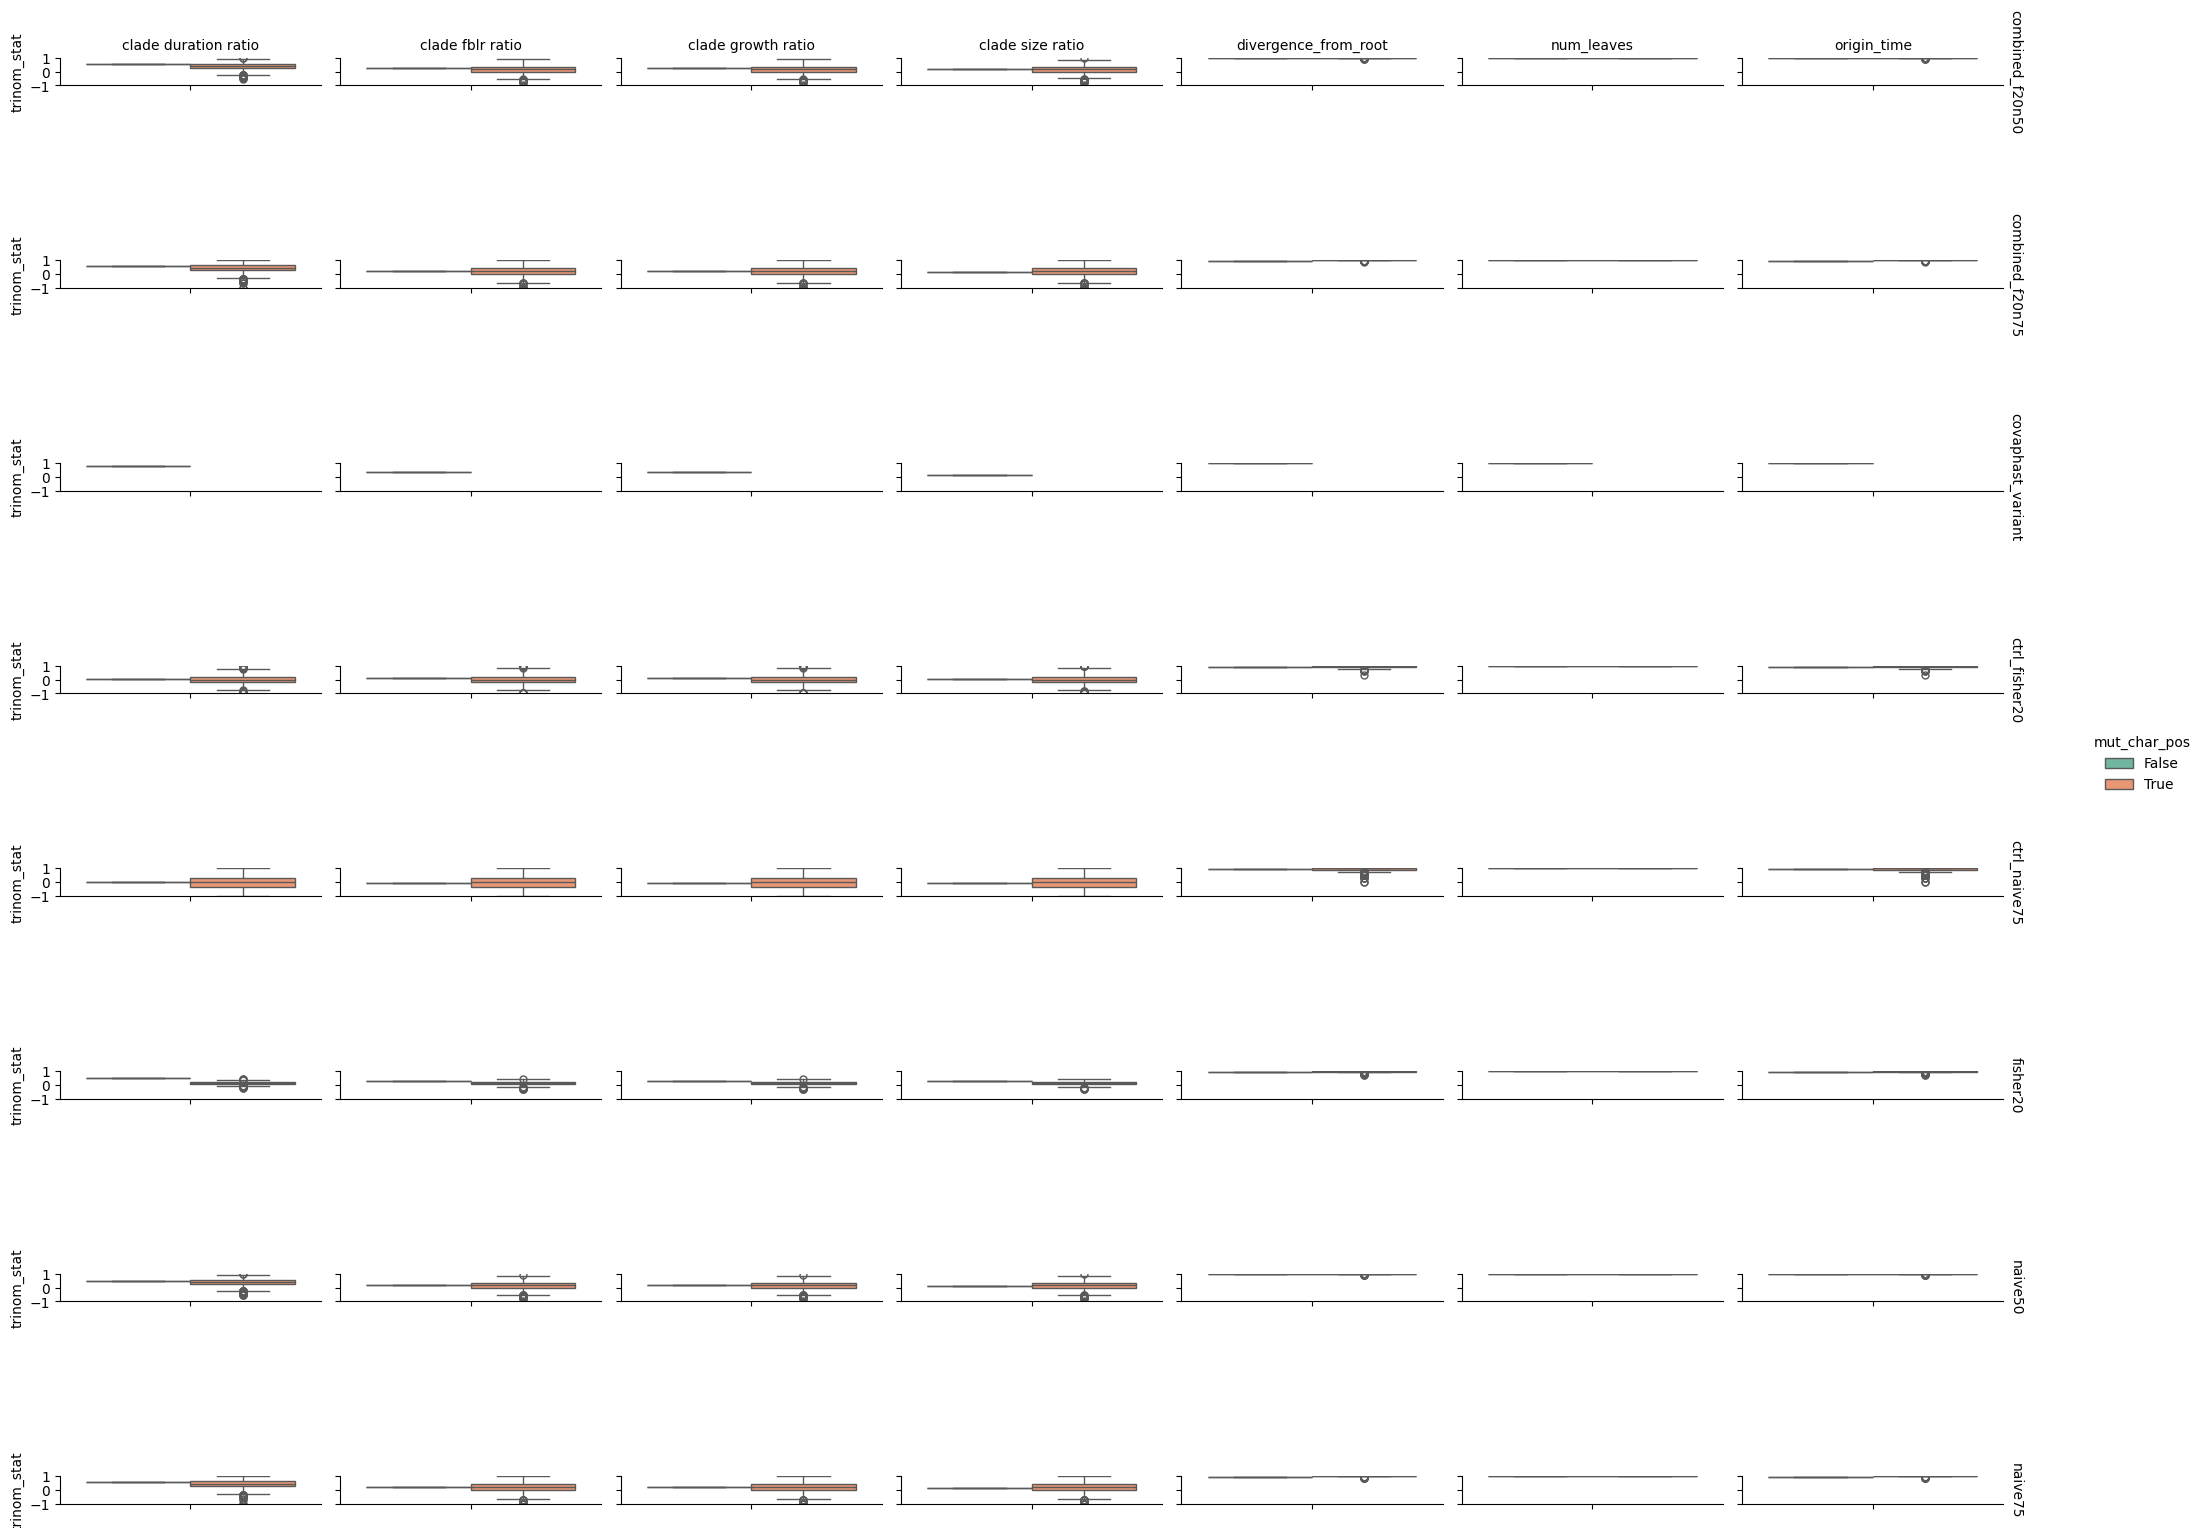

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


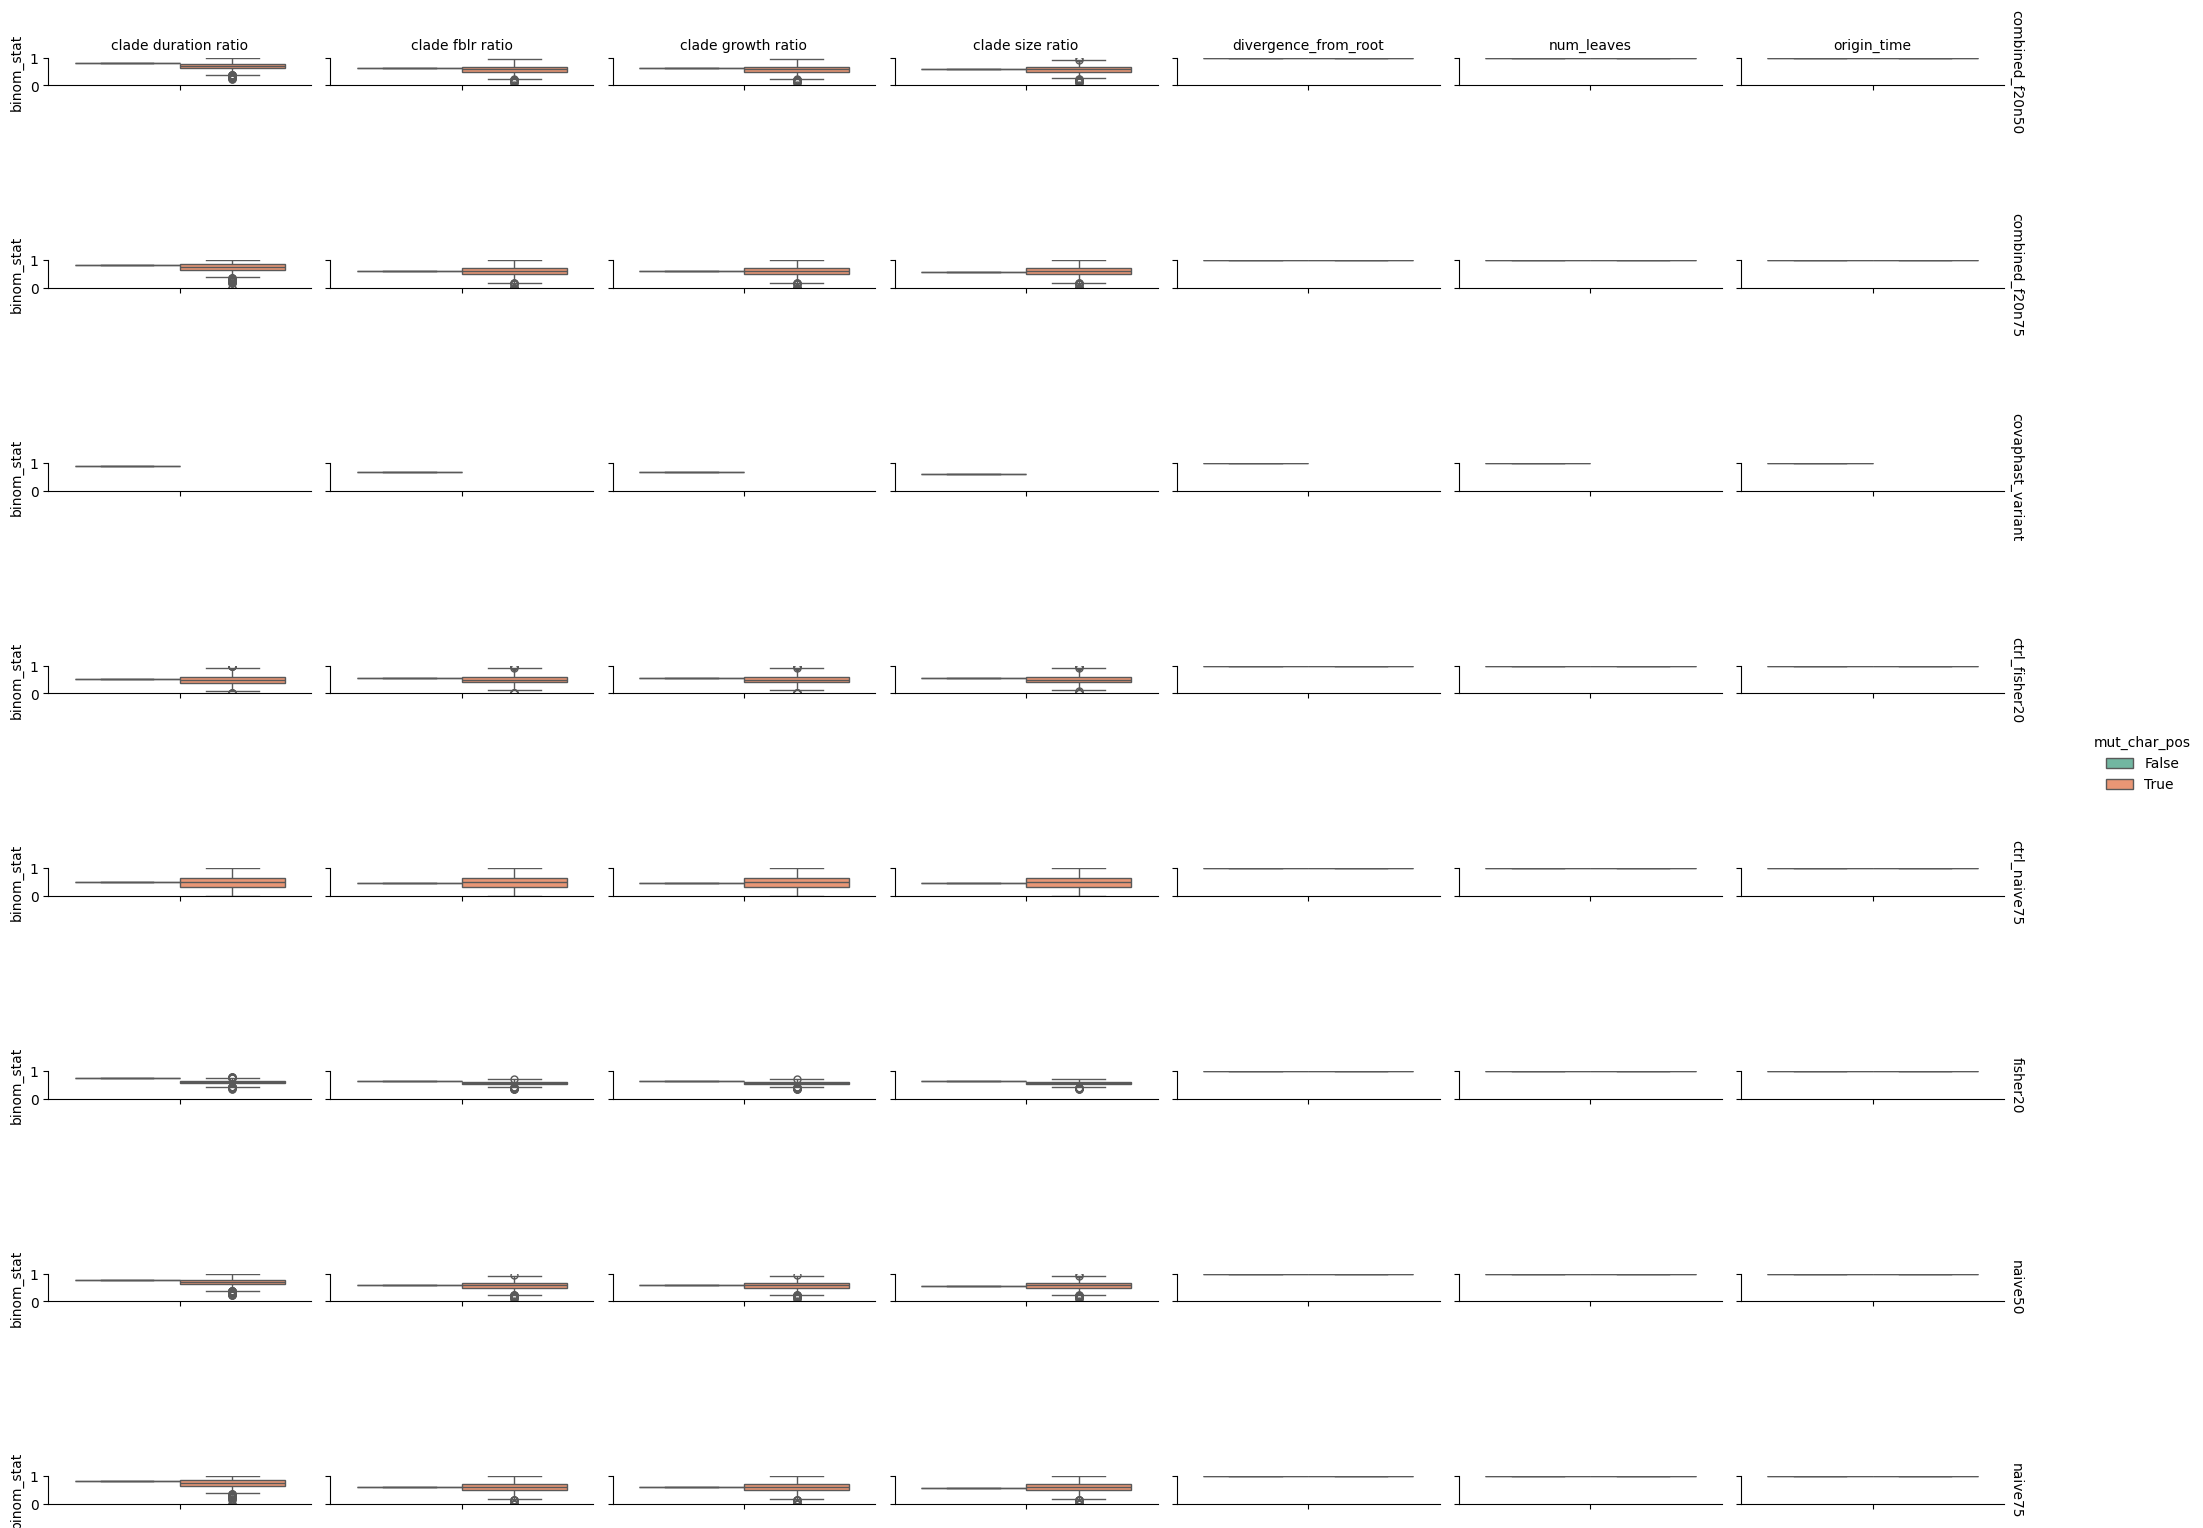

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


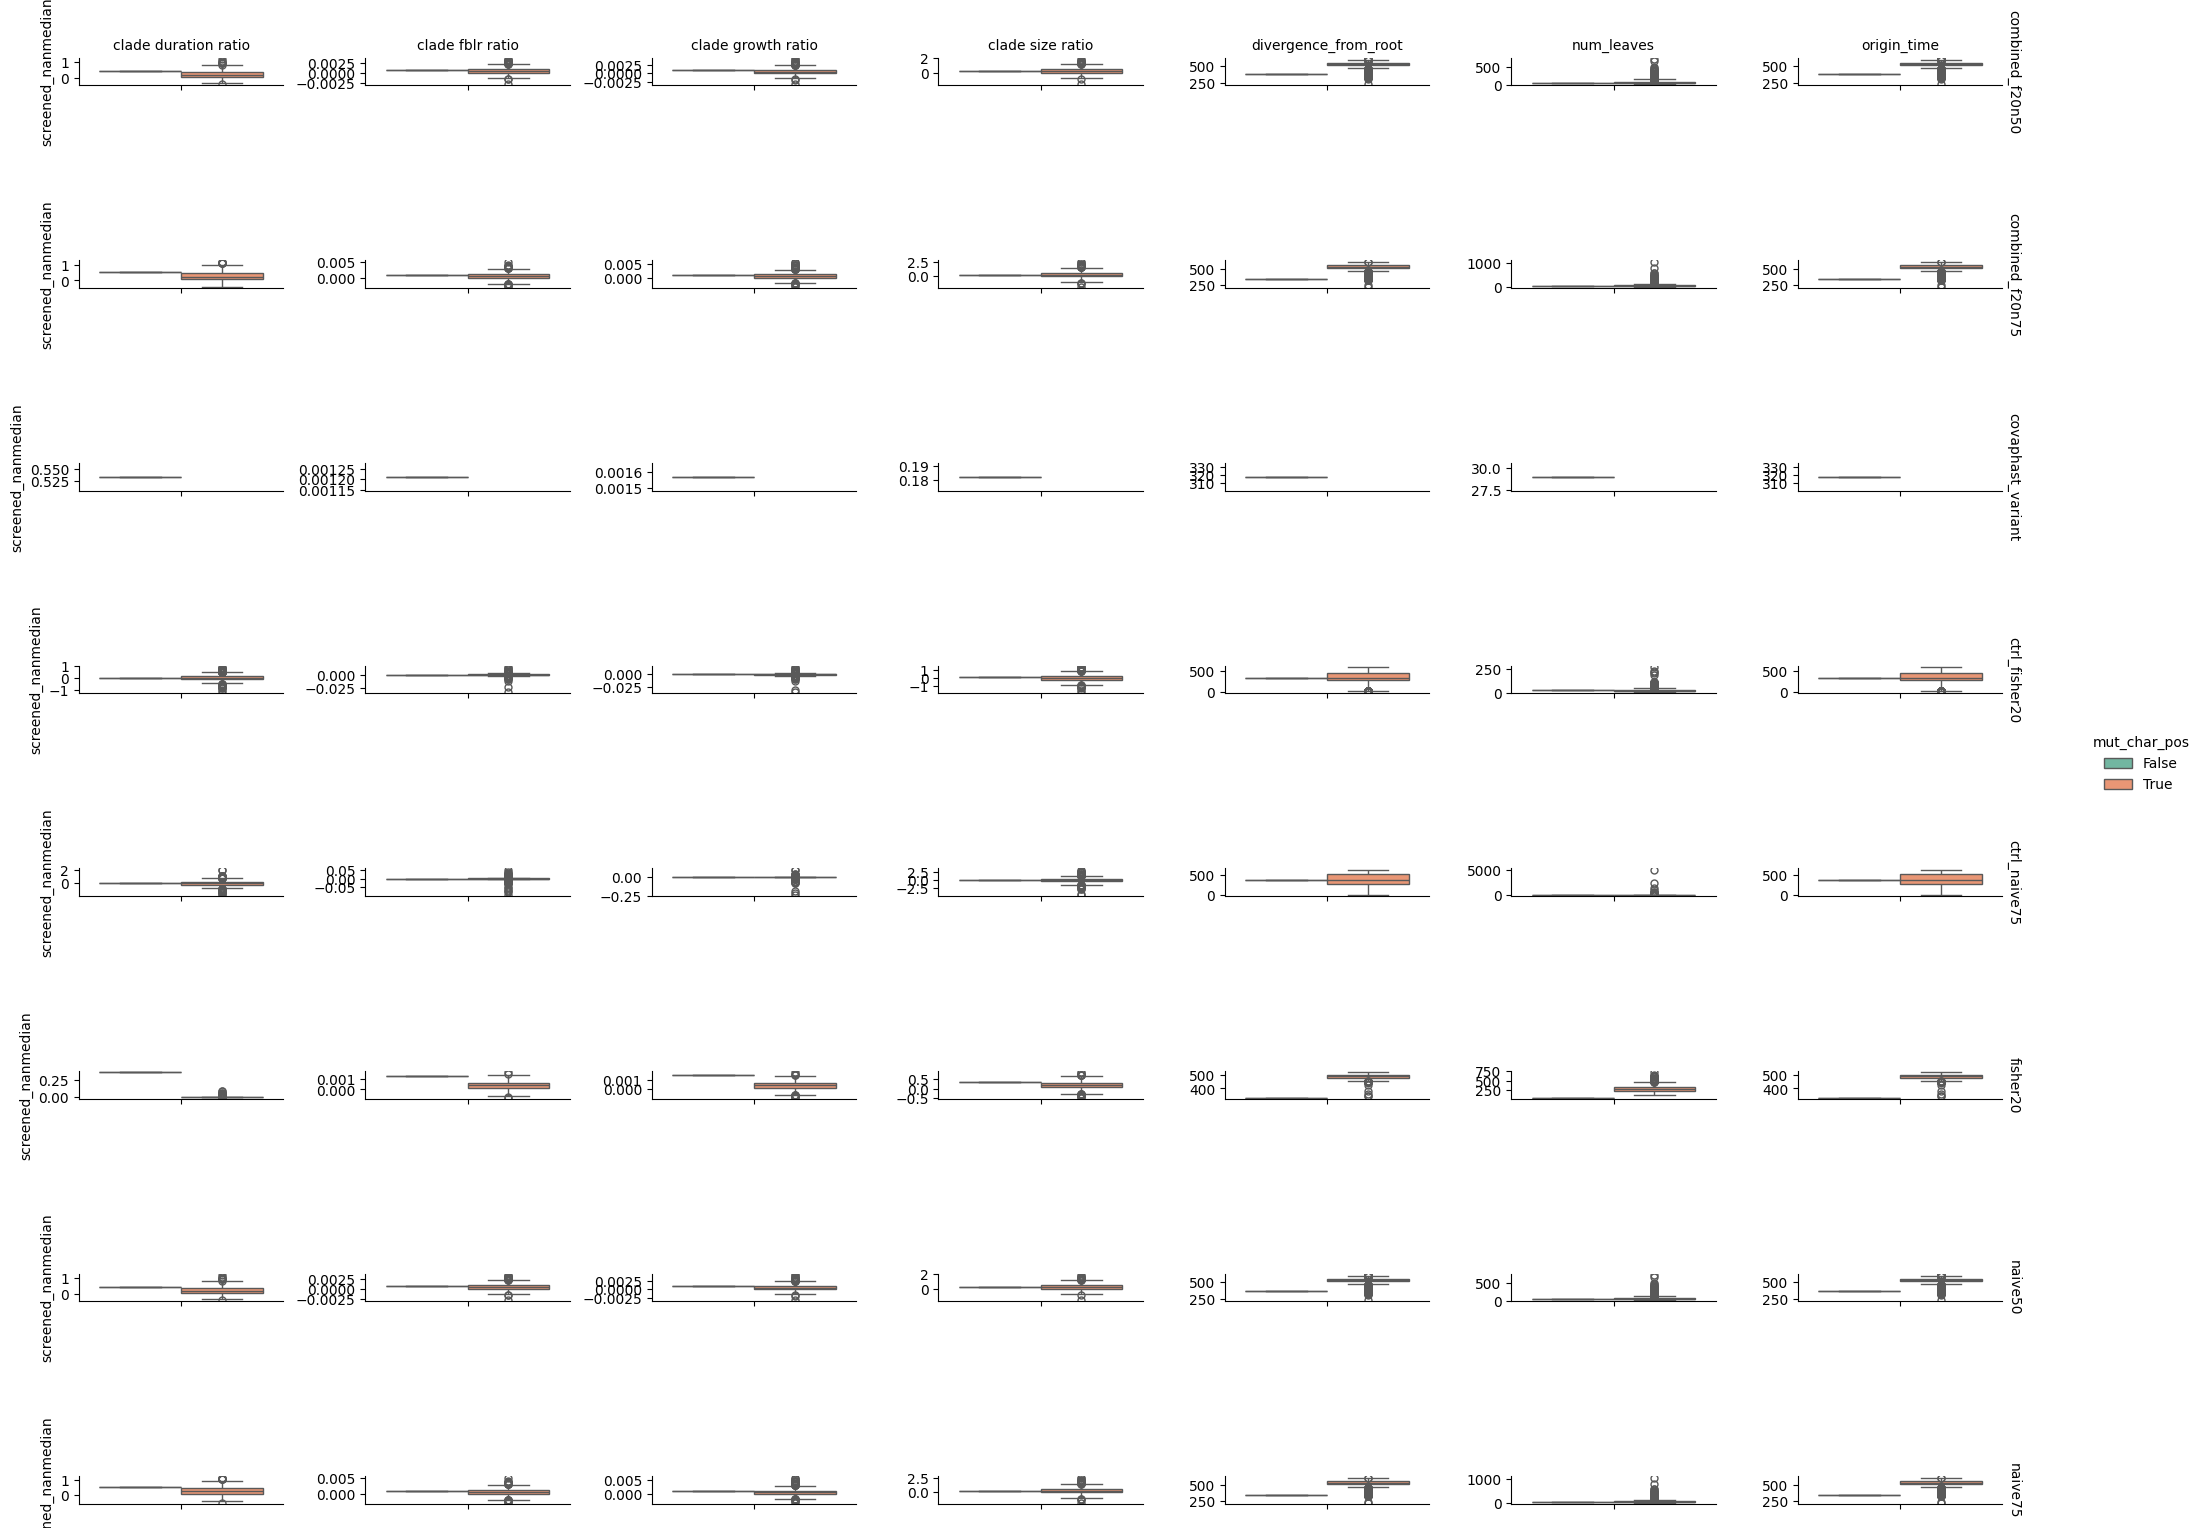

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


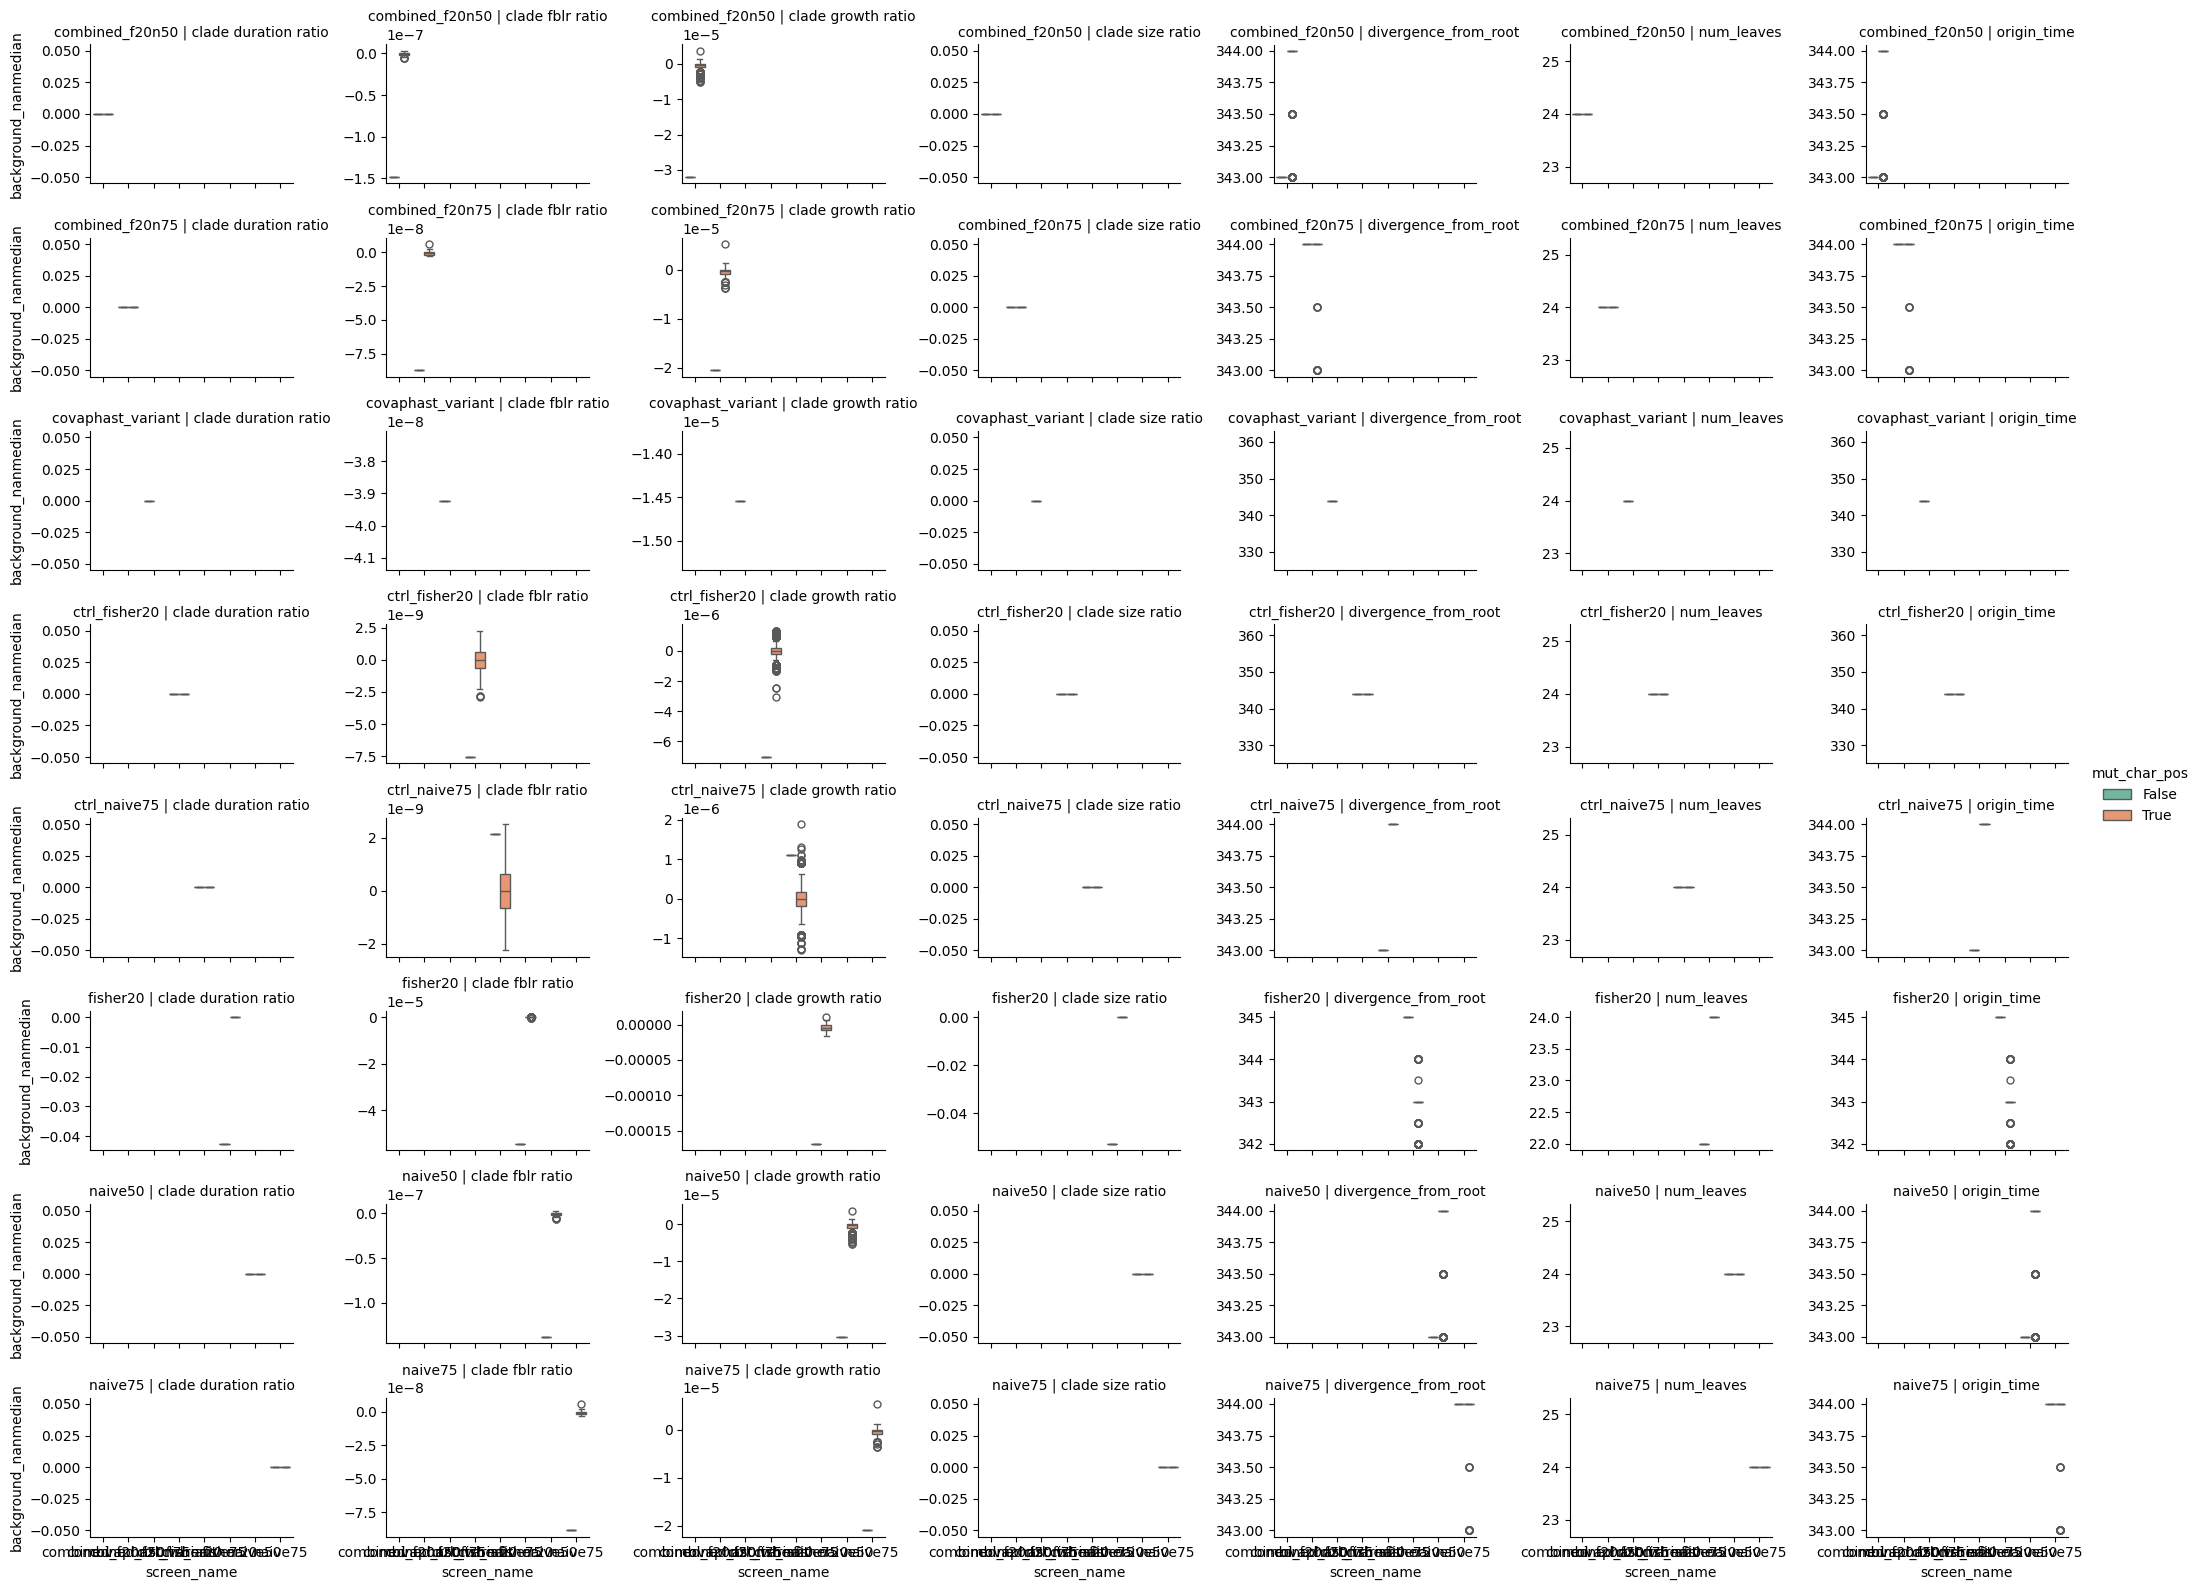

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
